In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Integration between seaborn and matplotlib
sns.set()

In [3]:
# Import data
df_segmentation = pd.read_csv('segmentation data.csv', index_col = 0)
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
# Explore data
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


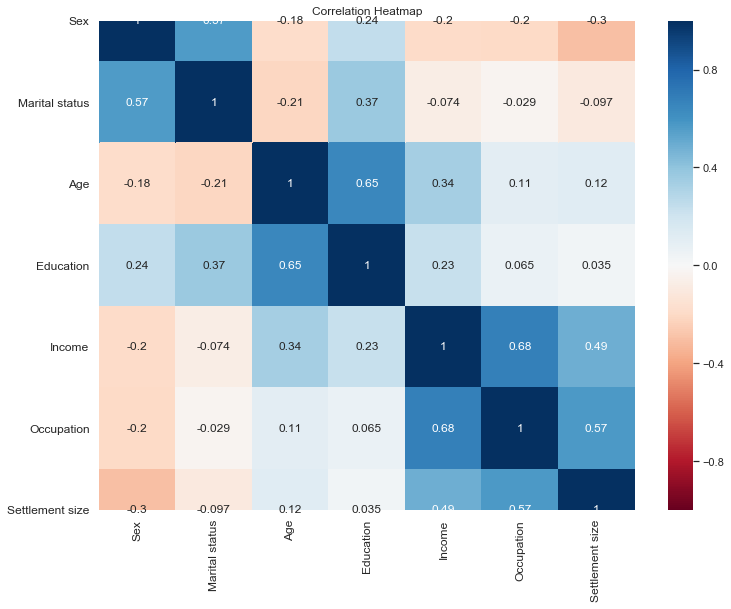

In [5]:
# Correlation estimate (Pearson Correlation - default in Python)

plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)

s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()


Text(0.5, 1.0, 'Raw Data Visualization')

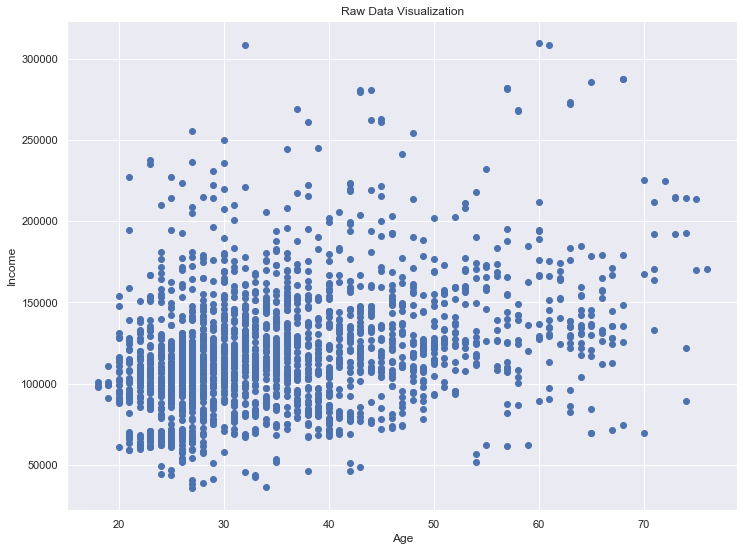

In [6]:
# Visualize Raw Data
# Data from column 2 "Age", and column 4 "Income"

plt.figure(figsize = (12, 9))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Raw Data Visualization')

## Standardization
Standardizing data, so that all features have equal weight. This is important for modelling. Otherwise, in our case Income would be considered much more important than Education for Instance. 

This is what is also refered to as bias.

In [7]:
# Standardization
# Output: input is an array and has been converted to float
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## Clustering

### Types of clustering:
- hierarchical (tree) eg. Animal kingdom
- flat (circles)

### How to measure the distances between observations:
- Euclidean distance (c in triangle)
- Manhattan distance (a,b in triangle)
- Maximum distance (distance on X axis)


To define clusters find a horizontal line on the dendrogram on which to cut.
Rule of thumb: find the longest vertical line unintercepted by a horizontal line from the dendrogram. This is where you should make the cut.

Hierarchical clustering may take even hours with the big dataset. But it's advantage is that it can find the number of clusters.

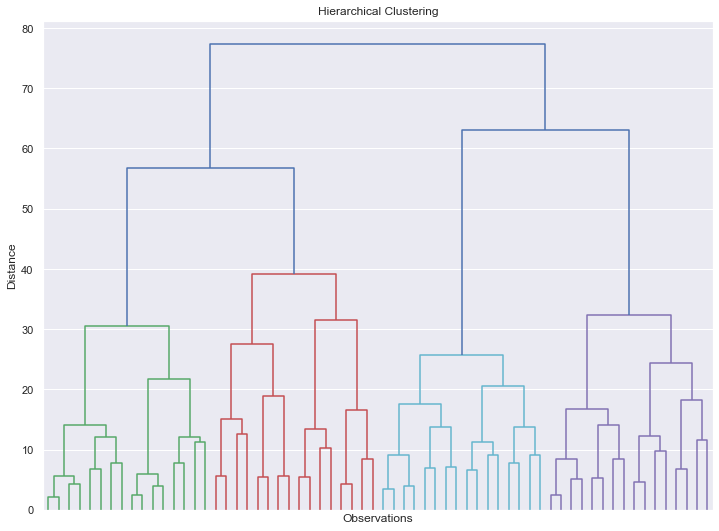

In [13]:
# Hierarchical Clustering

#output: a linkage matrix
hier_clust = linkage(segmentation_std, method= 'ward')

# Dendrogram: tree-like, hierarchical representation of points
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
#            color_threshold = 0)
plt.show()